In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [8]:
df=pd.read_csv("/Users/shivanishegokar/Downloads/uber.csv")
print("Initial data shape:",df.shape)
df.head()

Initial data shape: (200000, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df = df.dropna()
print("After removing NaN:",df.shape)

After removing NaN: (199999, 9)


In [10]:
df=df[(df['fare_amount']>0) & (df['passenger_count']>0) & (df['passenger_count']<7)]

In [11]:
df['pickup-datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce')
df=df.dropna(subset=['pickup_datetime'])

In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
def euclidean(lat1,lon1,lat2,lon2):
    return np.sqrt((lat2-lat1)**2 + (lon2-lon1)**2)
df['distance_km']= euclidean(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
df=df[(df['distance_km']>0) & (df['distance_km']<10)]
print("After removing invalid distances:", df.shape)

After removing invalid distances: (193229, 15)


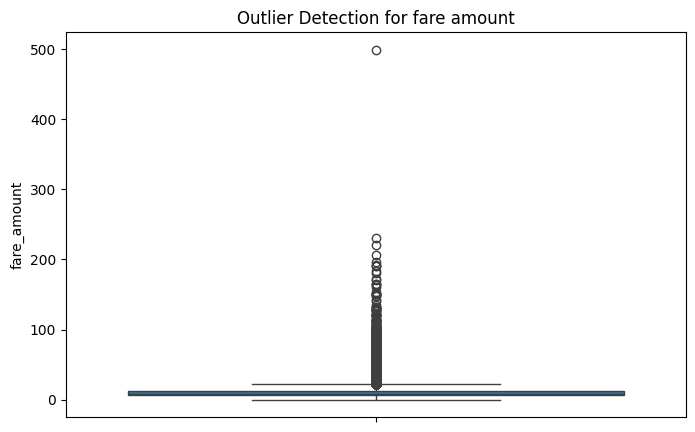

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(df['fare_amount'])
plt.title("Outlier Detection for fare amount")
plt.show()
                                

In [23]:
Q1=df['fare_amount'].quantile(0.25)
Q3=df['fare_amount'].quantile(0.75)
IQR=Q3-Q1
df = df[(df['fare_amount'] >= (Q1 - 1.5 * IQR)) & (df['fare_amount'] <= (Q3 + 1.5 * IQR))]
print("After removing Outliers:" ,df.shape)

After removing Outliers: (176683, 15)


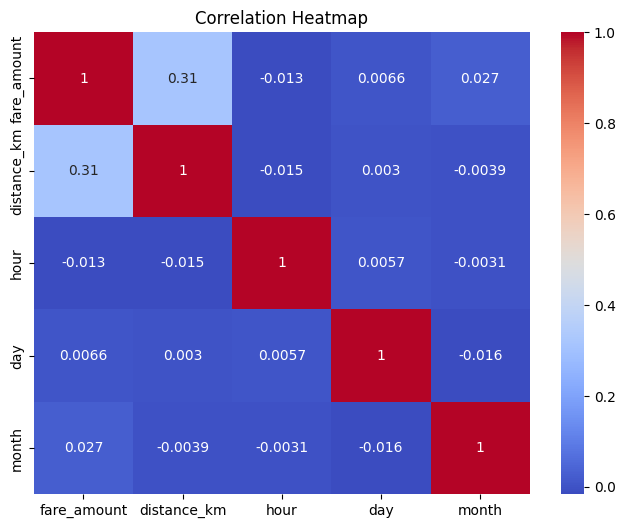

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['fare_amount','distance_km','hour','day','month']].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [28]:
features=['distance_km','hour','day','month','year','passenger_count']
X=df[features]
y=df['fare_amount']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)


In [30]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [33]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)


In [34]:
def evaluate(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\nModel: {model_name}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regressor")


Model: Linear Regression
R² Score: -0.0878
RMSE: 4.3423
MAE: 2.8612

Model: Random Forest Regressor
R² Score: 0.7355
RMSE: 2.1412
MAE: 1.5281


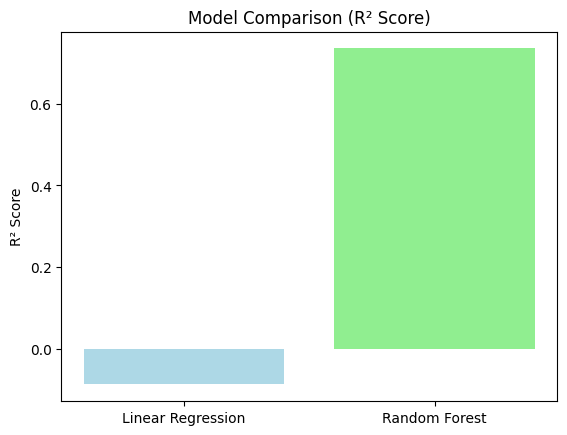

In [36]:
models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
plt.bar(models, r2_scores, color=['lightblue', 'lightgreen'])
plt.title('Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.show()